In [37]:
import numpy as np
#Distribución de manantiales de intensidad constante
a=0
b=1
q = 5.9
def fdot(t,num=10**7):
    t0 = np.linspace(a,b,num)
    fd=0
    dt0 = (b-a)/num
    for i in range(num):
        if t-t0[i]!=0j:
            fd+=q/(t-t0[i])
    fd *= dt0*(1/(2*np.pi))
    return fd

#Punto de interés
t1 = complex(1.4, 8.1)
fd = fdot(t1)
u1,v1 = [fd.real,-fd.imag]

redon=4
print('Con q(x) =',q)
print('Vel horizontal de',t1,'es:',u1,'m/s')
print('Vel horizontal redondeada es:',round(u1,redon),'m/s')
print('Vel vertical de',t1,'es:',v1,'m/s')
print('Vel vertical redondeada es:',round(v1,redon),'m/s')

Con q(x) = 5.9
Vel horizontal de (1.4+8.1j) es: 0.012676827482734443 m/s
Vel horizontal redondeada es: 0.0127 m/s
Vel vertical de (1.4+8.1j) es: 0.11437753406234803 m/s
Vel vertical redondeada es: 0.1144 m/s


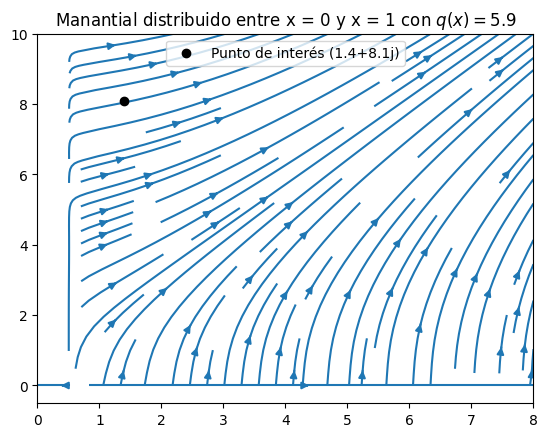

In [41]:
import matplotlib.pyplot as plt
n=50
x=np.linspace(0,8,n)
y=np.linspace(0,10,n)
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

for i in range(n):
    for j in range(n):
        t = complex(X[i][j],Y[j][i])
        U[i][j]=fdot(t,10**3).real
        V[j][i]=-fdot(t,10**3).imag

plt.title('Manantial distribuido entre x = '+str(a)+' y x = '+str(b)+' con '+'$q(x) =$'+str(q))
plt.streamplot(X,Y,U,V)
plt.plot(t1.real,t1.imag,'o',color='black',label='Punto de interés '+str(t1))
plt.legend()
plt.show()